In [1]:
# Importing required libraries
import pandas as pd
import numpy as np

In [2]:
# Loading the data
data = pd.read_csv('Building_Permits.csv')
data.head()

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (22,32) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992


In [3]:
# Checking the columns
data.columns

Index(['Permit Number', 'Permit Type', 'Permit Type Definition',
       'Permit Creation Date', 'Block', 'Lot', 'Street Number',
       'Street Number Suffix', 'Street Name', 'Street Suffix', 'Unit',
       'Unit Suffix', 'Description', 'Current Status', 'Current Status Date',
       'Filed Date', 'Issued Date', 'Completed Date',
       'First Construction Document Date', 'Structural Notification',
       'Number of Existing Stories', 'Number of Proposed Stories',
       'Voluntary Soft-Story Retrofit', 'Fire Only Permit',
       'Permit Expiration Date', 'Estimated Cost', 'Revised Cost',
       'Existing Use', 'Existing Units', 'Proposed Use', 'Proposed Units',
       'Plansets', 'TIDF Compliance', 'Existing Construction Type',
       'Existing Construction Type Description', 'Proposed Construction Type',
       'Proposed Construction Type Description', 'Site Permit',
       'Supervisor District', 'Neighborhoods - Analysis Boundaries', 'Zipcode',
       'Location', 'Record ID'],
     

In [4]:
# Shape of the data 
data.shape

(198900, 43)

## Handling Missing Values

In [5]:
# Missing value count
missing_value_count = data.isnull().sum()
missing_value_count

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [6]:
# Percentage of the missing values
total_cells = np.product(data.shape)
total_missing = missing_value_count.sum()

missing_percent = (total_missing/total_cells) * 100
missing_percent

26.26002315058403

In [7]:
dropped_data = data.dropna(axis = 1)
dropped_data.shape

(198900, 12)

In [8]:
print('Number of columns in the dataset before dropping',data.shape[1])
print('Number of columns in the dataset after dropping',dropped_data.shape[1])

Number of columns in the dataset before dropping 43
Number of columns in the dataset after dropping 12


## Scaling and Normalzation

In [9]:
from scipy import stats
from sklearn.preprocessing import minmax_scale
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = np.random.exponential(size = 1000)

In [11]:
scaled_data = minmax_scale(df)
scaled_data

array([1.36177032e-01, 3.95515317e-01, 1.18460363e-01, 4.05152356e-01,
       6.50359591e-01, 1.04921714e-01, 4.93708272e-02, 1.53962865e-02,
       2.59307220e-03, 1.65223616e-01, 2.84172745e-01, 1.71944727e-01,
       1.75504393e-01, 3.21117397e-02, 1.67977803e-01, 2.13900433e-02,
       1.75356980e-01, 5.85261901e-02, 2.06907661e-02, 1.39375499e-03,
       4.12564716e-02, 2.18357045e-02, 1.83593875e-01, 5.49691438e-01,
       2.05033438e-02, 1.80380649e-01, 8.18692046e-02, 1.24843568e-01,
       1.35665607e-01, 1.27094361e-02, 3.70451499e-02, 2.25530958e-01,
       1.49279753e-02, 5.66910163e-01, 1.25413866e-01, 3.36253291e-01,
       2.48352026e-01, 7.43539136e-02, 1.16534616e-01, 4.40819918e-02,
       7.11951770e-03, 7.60769886e-02, 5.72393380e-01, 4.33392272e-03,
       2.26284763e-01, 4.78867890e-02, 4.17566297e-01, 1.89450936e-01,
       4.46221874e-01, 2.60830495e-01, 7.33439587e-02, 7.13673969e-02,
       5.84148192e-01, 5.76501281e-02, 2.25029847e-01, 2.18714833e-01,
      

Text(0.5, 1.0, 'Scaled_Data')

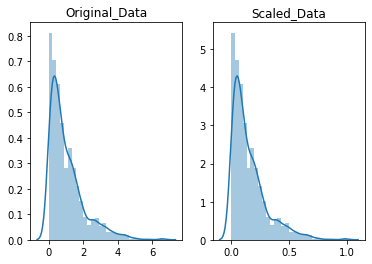

In [12]:
fig, ax = plt.subplots(1,2)
sns.distplot(df, ax=ax[0])
ax[0].set_title('Original_Data')
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title('Scaled_Data')

Text(0.5, 1.0, 'Scaled_Data')

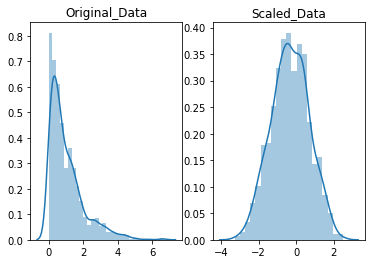

In [13]:
normalized_data = stats.boxcox(df)

fig, ax = plt.subplots(1,2)
sns.distplot(df, ax=ax[0])
ax[0].set_title('Original_Data')
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title('Scaled_Data')

## Parsing Dates


In [14]:
dates_data = pd.read_csv('database.csv')
dates_data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [15]:
dates_data['Date'].head()

0    01/02/1965
1    01/04/1965
2    01/05/1965
3    01/08/1965
4    01/09/1965
Name: Date, dtype: object

In [16]:
dates_data['Date'].dtype

dtype('O')

In [17]:
dates_data['dates_parsed'] = pd.to_datetime(dates_data['Date'])

In [18]:
dates_data['dates_parsed'].head()

0    1965-01-02 00:00:00
1    1965-01-04 00:00:00
2    1965-01-05 00:00:00
3    1965-01-08 00:00:00
4    1965-01-09 00:00:00
Name: dates_parsed, dtype: object

## Character Encoding

In [19]:
before = 'Hello World!'
type(before)

str

In [20]:
after = before.encode(encoding='utf-8', errors='replace')
type(after)

bytes

In [21]:
after

b'Hello World!'

## Inconsistent Data

In [22]:
import fuzzywuzzy
from fuzzywuzzy import process

C:\Users\user\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [23]:
countries = pd.read_csv('pakistan_intellectual_capital.csv')
countries.head()

,Unnamed: 0,S#,Teacher Name,University Currently Teaching,Department,Province University Located,Designation,Terminal Degree,Graduated from,Country,Year,Area of Specialization/Research Interests,Other Information
0,2,3,Dr. Abdul Basit,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,Software Engineering & DBMS,NaN
1,4,5,Dr. Waheed Noor,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,DBMS,NaN
2,5,6,Dr. Junaid Baber,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"Information processing, Multimedia mining",NaN
3,6,7,Dr. Maheen Bakhtyar,University of Balochistan,Computer Science & IT,Balochistan,Assistant Professor,PhD,Asian Institute of Technology,Thailand,NaN,"NLP, Information Retrieval, Question Answering...",NaN
4,24,25,Samina Azim,Sardar Bahadur Khan Women's University,Computer Science,Balochistan,Lecturer,BS,Balochistan University of Information Technolo...,Pakistan,2005.0,VLSI Electronics DLD Database,NaN


In [24]:
country_list = countries['Country'].unique()
country_list

array(['Thailand', 'Pakistan', 'germany', 'Austria', 'Australia', 'UK',
       'China', 'France', 'USofA', 'SouthKorea', 'Malaysia', 'Sweden',
       'Italy', 'Canada', 'Norway', 'Ireland', 'New Zealand', 'Urbana',
       'Portugal', 'Russian Federation', 'USA', 'Finland', ' USA',
       'Netherland', ' Germany', ' Sweden', ' New Zealand', 'Greece',
       'Turkey', 'South Korea', 'Macau', 'Singapore', 'Spain', 'Japan',
       'HongKong', 'Saudi Arabia', 'Mauritius', 'Scotland'], dtype=object)

In [25]:
country_list.sort()
country_list

array([' Germany', ' New Zealand', ' Sweden', ' USA', 'Australia',
       'Austria', 'Canada', 'China', 'Finland', 'France', 'Greece',
       'HongKong', 'Ireland', 'Italy', 'Japan', 'Macau', 'Malaysia',
       'Mauritius', 'Netherland', 'New Zealand', 'Norway', 'Pakistan',
       'Portugal', 'Russian Federation', 'Saudi Arabia', 'Scotland',
       'Singapore', 'South Korea', 'SouthKorea', 'Spain', 'Sweden',
       'Thailand', 'Turkey', 'UK', 'USA', 'USofA', 'Urbana', 'germany'],
      dtype=object)

In [26]:
countries['Country'] = countries['Country'].str.lower()

In [27]:
countries['Country'].unique()

array(['thailand', 'pakistan', 'germany', 'austria', 'australia', 'uk',
       'china', 'france', 'usofa', 'southkorea', 'malaysia', 'sweden',
       'italy', 'canada', 'norway', 'ireland', 'new zealand', 'urbana',
       'portugal', 'russian federation', 'usa', 'finland', ' usa',
       'netherland', ' germany', ' sweden', ' new zealand', 'greece',
       'turkey', 'south korea', 'macau', 'singapore', 'spain', 'japan',
       'hongkong', 'saudi arabia', 'mauritius', 'scotland'], dtype=object)

In [28]:
matches = fuzzywuzzy.process.extract("germany", countries['Country'], limit=10, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('germany', 100, 11),
 ('germany', 100, 58),
 ('germany', 100, 65),
 ('germany', 100, 90),
 ('germany', 100, 102),
 ('germany', 100, 120),
 ('germany', 100, 231),
 ('germany', 100, 257),
 ('germany', 100, 320),
 ('germany', 100, 367)]